In [3]:
# Importing Basic Libraries and data

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
'''
About data:
Email - Email id of the user
address - Address of the user 
Avatar - Avatar of user (profile pic)
Avg_session_length - How much minutes the user in staying on the platform 
Time of app -  time in minutes spent on app 
timme on web - time in minutes spend on web
length of membership - Duration of the mmembership of user 
'''

'\nAbout data:\nEmail - Email id of the user\naddress - Address of the user \nAvatar - Avatar of user (profile pic)\nAvg_session_length - How much minutes the user in staying on the platform \nTime of app -  time in minutes spent on app \ntimme on web - time in minutes spend on web\nlength of membership - Duration of the mmembership of user \n'

In [8]:
# Basic operation on data

In [9]:
df.shape

(500, 8)

In [10]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [13]:
# Remove unwanted columns 

In [14]:
len(df['Avatar'].unique())

138

In [15]:
len(df['Email'].unique())

500

In [16]:
# as we can see the email, address,avatar wont help as in making the model and helping in making the pattern 

In [17]:
df.drop(columns=['Email','Avatar','Address'],inplace= True)

In [18]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [19]:
# EDA

In [20]:
# Avg. session length

<Axes: xlabel='Avg. Session Length', ylabel='Count'>

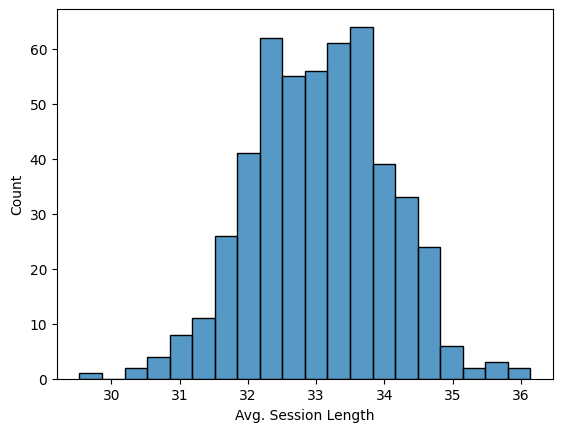

In [21]:
sns.histplot(x=df['Avg. Session Length'],data=df)

In [22]:
df['Avg. Session Length'].skew()

np.float64(-0.03217480705175727)

-0.03217480705175727


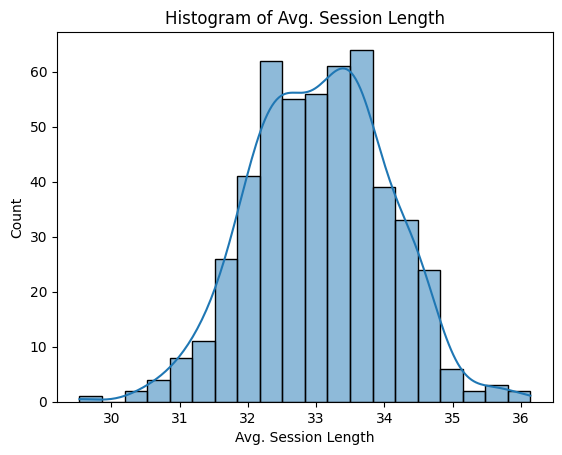

-0.08912109751093247


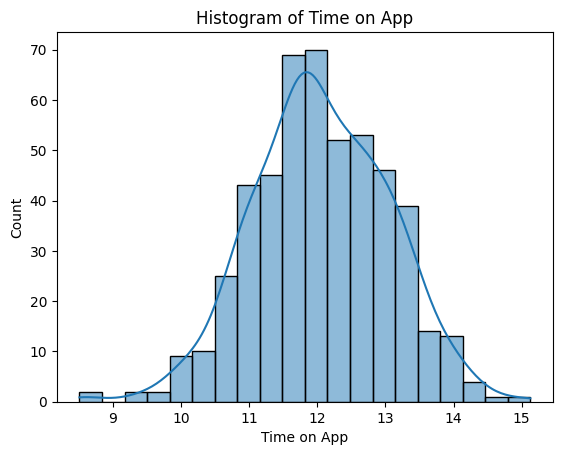

0.012141880271484171


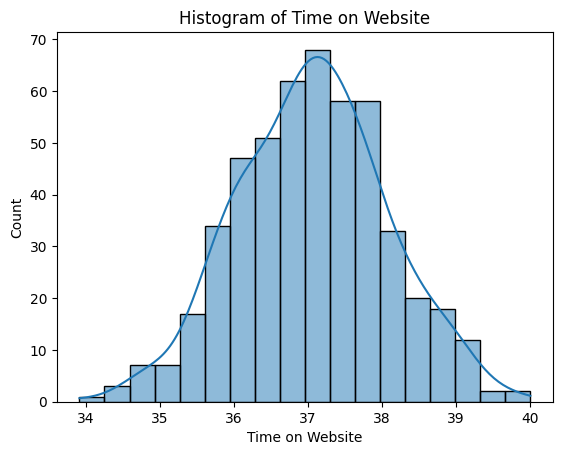

-0.10660805308864045


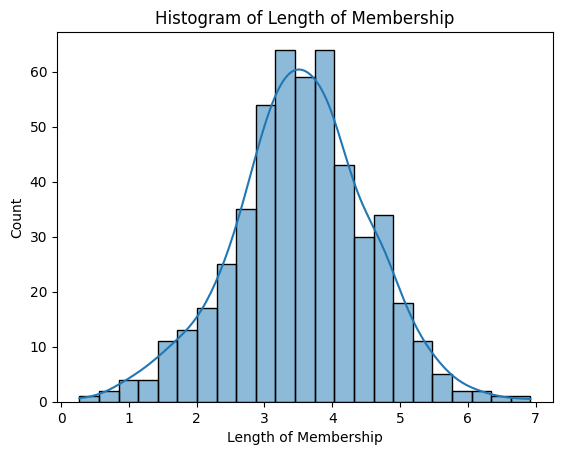

0.03479018411523428


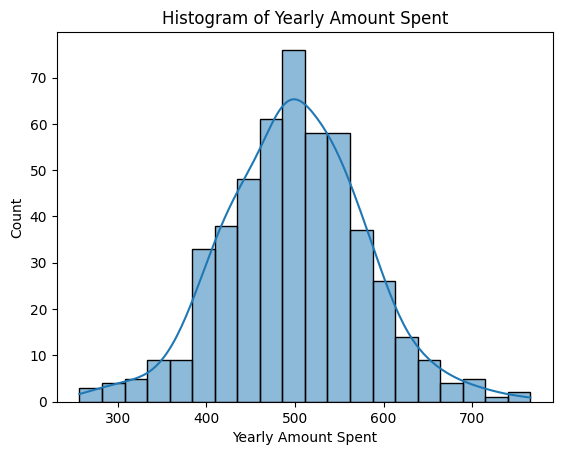

In [23]:
for i in df.columns:
    sns.histplot(df[i],kde=True)
    plt.title(f'Histogram of {i}')
    print(df[i].skew())
    plt.show()

In [24]:
# All the data is normally distrubuted 

<Figure size 500x500 with 0 Axes>

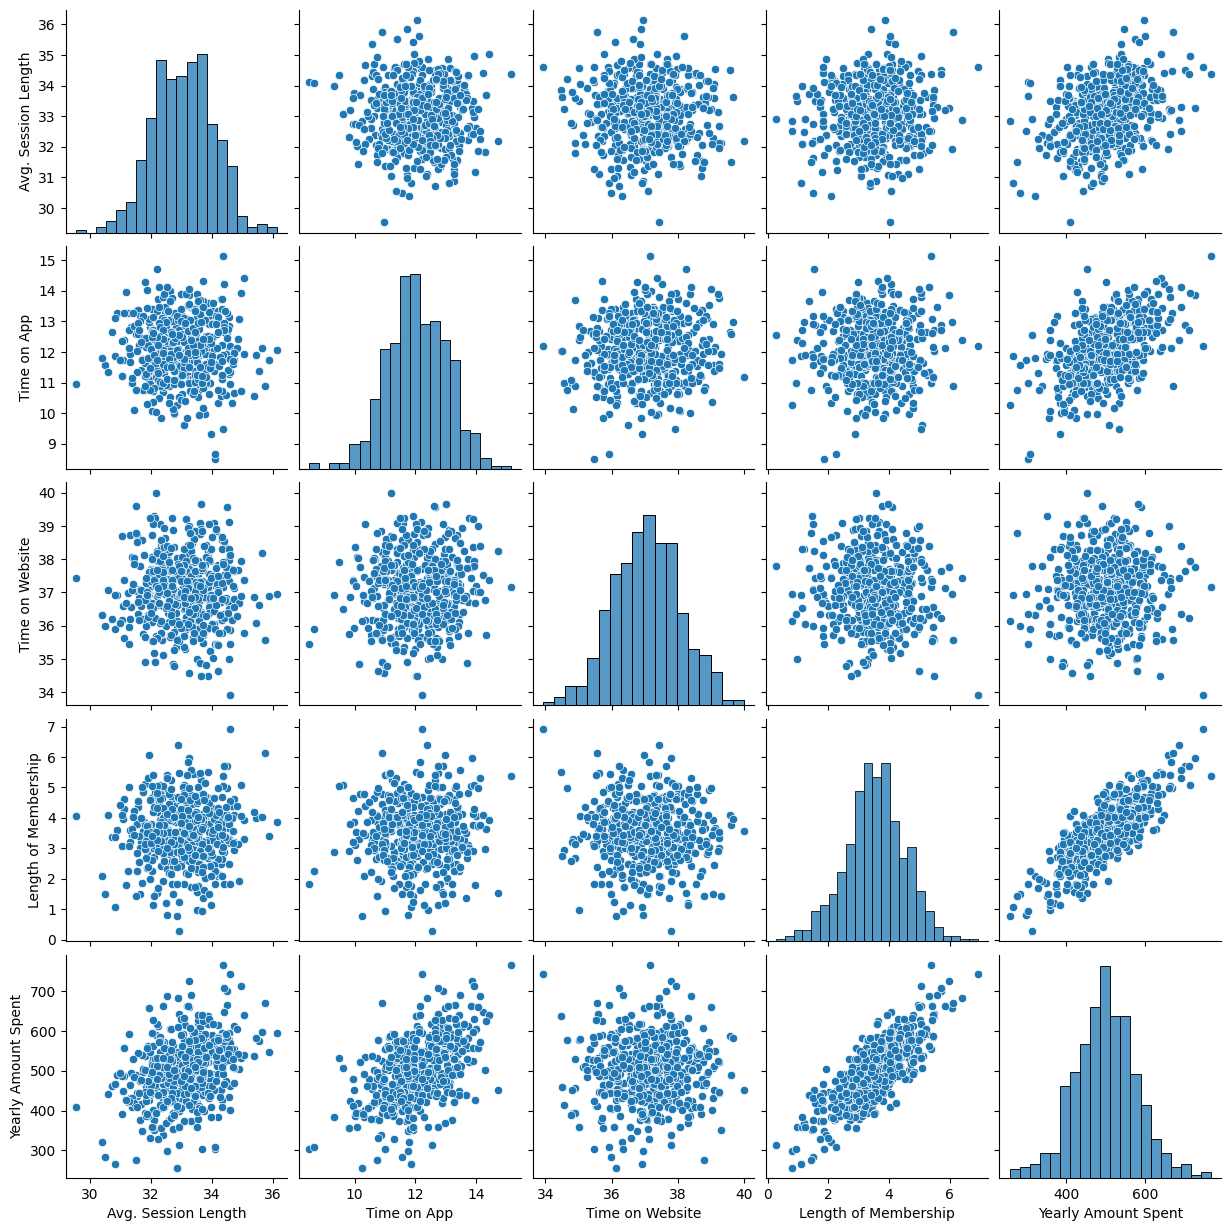

In [25]:
# Multivariate EDA

plt.figure(figsize=(5,5))
sns.pairplot(df)

In [26]:
# Checking outliers using boxplot

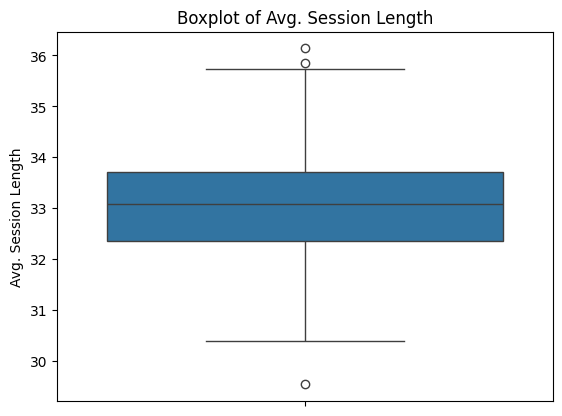

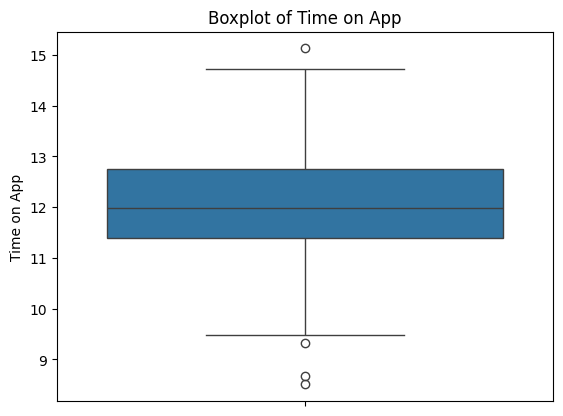

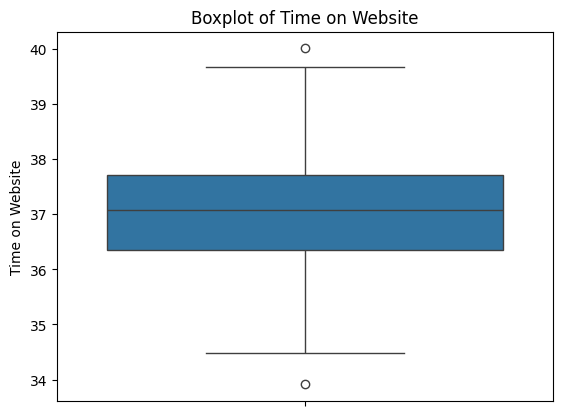

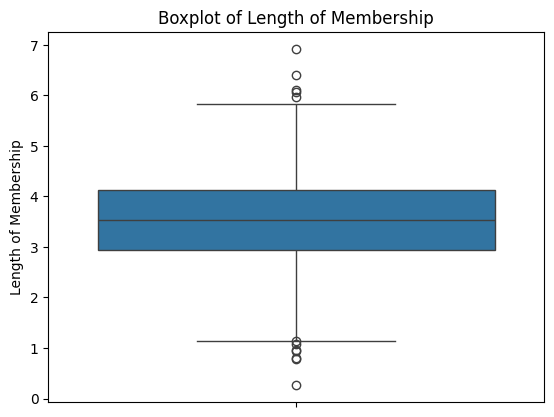

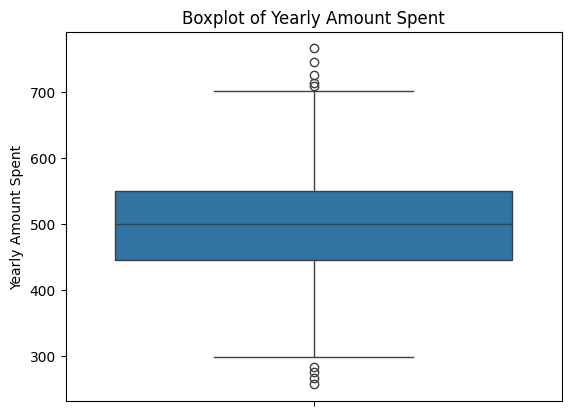

In [27]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

All the columns have outliers

In [28]:
# Feature Engineering

Handling outlier using IQR method

In [29]:
Q1= df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
higher = Q3 + (1.5 * IQR)
df= df[~((df < lower)| (df > higher)).any(axis=1)]


In [30]:
df.shape

(476, 5)

24 rows that were outlier has been removed


In [31]:
# Checking Multicollinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

x= df.drop('Yearly Amount Spent', axis=1)

x = sm.add_constant(x)

vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [33]:
vif_data

,Feature,VIF
0,const,2796.523836
1,Avg. Session Length,1.001601
2,Time on App,1.008345
3,Time on Website,1.006150
4,Length of Membership,1.004977


Our Data has no high multicollinearity

In [34]:
#Feature Selection using correlation method

In [35]:
corr = df.corrwith(df['Yearly Amount Spent'])

In [36]:
corr

Avg. Session Length     0.339804
Time on App             0.475560
Time on Website         0.000581
Length of Membership    0.767651
Yearly Amount Spent     1.000000
dtype: float64

As we can see Time on Website is not at all correlated with the data

Feature selection using RFE method

In [37]:
x = df.drop('Yearly Amount Spent', axis=1)
y= df['Yearly Amount Spent']

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


model = LinearRegression()

rfe = RFE(model,n_features_to_select=3) #this will rerun the model again and choose the best 3 feature

rfe = rfe.fit(x,y)

selected_feature = x.columns[rfe.support_]

print("Selected Features using RFE")
print(selected_feature)

Selected Features using RFE
Index(['Avg. Session Length', 'Time on App', 'Length of Membership'], dtype='object')


Creating new dataset from selected features

In [39]:
df1 = df[selected_feature]
df1['Yearly Amount Spent'] = df['Yearly Amount Spent']

In [40]:
df1

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092
...,...,...,...,...
495,33.237660,13.566160,3.746573,573.847438
496,34.702529,11.695736,3.576526,529.049004
497,32.646777,11.499409,4.958264,551.620145
498,33.322501,12.391423,2.336485,456.469510


MACHINE LEARNING MODEL BUILDING 

In [41]:
x = df1.drop('Yearly Amount Spent', axis=1)
y = df1['Yearly Amount Spent']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [44]:
from sklearn.linear_model import LinearRegression ,Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [47]:
model = {
    "LinearRegression" :LinearRegression(),
    'Lasso' : Lasso(),
    "Ridge" : Ridge(),
    "ElasticNet" :ElasticNet()
}

for name , model in model.items():
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_test_scaled)

    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    print(f'{name}: MSE: {mse:.2f},R2: {r2:.2f},MAE:{mae:.2F}')
    

LinearRegression: MSE: 104.97,R2: 0.98,MAE:8.07
Lasso: MSE: 106.20,R2: 0.98,MAE:8.25
Ridge: MSE: 104.92,R2: 0.98,MAE:8.08
ElasticNet: MSE: 739.15,R2: 0.85,MAE:22.21


In [52]:
# Hyperparam on Elastic net 
from sklearn.model_selection import GridSearchCV
elastic = ElasticNet()

param = {
    'alpha': [0.1,0.5,1.0,5.0,10.0],
    'l1_ratio': [0.1,0.5,0.9]
}

grid_search = GridSearchCV(estimator=elastic,param_grid=param,cv=5,scoring='neg_mean_absolute_error')

grid_search.fit(x_train_scaled,y_train)

print(grid_search.best_params_)

print(grid_search.best_score_)


{'alpha': 0.1, 'l1_ratio': 0.9}
-8.0833267535163


In [57]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)


print(f'MSE: {mse:.2f},R2: {r2:.2f},MAE:{mae:.2F}')

MSE: 2078493.41,R2: -416.82,MAE:1441.65


Model is overfitting

In [58]:
# testing on data

In [59]:
df1.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


In [62]:
data = np.array([35,10,5]).reshape(1,-1)

In [63]:
data

array([[35, 10,  5]])

In [64]:
data_new = scaler.transform(data)

In [65]:
best_model.predict(data_new)

array([559.49953384])

Save our model